In [1]:
from classes import *
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from matplotlib.axis import Axis

In [2]:
m = Measurments('hBN_1')
p = Process_DC_IV(m.get_abspath())
d = Draw_DC_IV(m.get_abspath())

In [3]:
m.delete_measurments({16: [i for i in range(52)] + [i for i in range(101,107)] + [154,155]})
dict_16 = m.get_contact_dict(16)

In [4]:
'''fig = plt.figure(figsize=(14, 7), constrained_layout=True)
#fig.tight_layout(pad=1)
fig.suptitle('Контакт №16', size = 20)
gs = GridSpec(ncols=5, nrows=4, figure=fig)

ax_1 = fig.add_subplot(gs[0:,:3])

ax_2_1 = fig.add_subplot(gs[0,3])
ax_2_2 = fig.add_subplot(gs[1,3])
ax_2_3 = fig.add_subplot(gs[2,3])
ax_2_4 = fig.add_subplot(gs[3,3])

ax_3_1 = fig.add_subplot(gs[0,4])
ax_3_2 = fig.add_subplot(gs[1,4])
ax_3_3 = fig.add_subplot(gs[2,4])
ax_3_4 = fig.add_subplot(gs[3,4])

I = p.on_off_current(dict_16, 1)
V = p.ReRAM_on_off_voltage(dict_16)

coll = d.multiple(dict_16, ax_1, color = 'r', linewidth = 1)
d.colored_lines(coll)
ax_1.autoscale_view()
ax_1.set_yscale('log')
ax_1.tick_params(axis='both', labelsize = 15)
ax_1.set(xlim=(-3, 3), ylim=(10**(-12), 10 ** (-2)))
ax_1.set_xlabel(xlabel='Напряжение, В', size = 17)
ax_1.set_ylabel(ylabel='Ток, А', size = 17)
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
y_major = ticker.LogLocator(base = 10.0, numticks = 10)
ax_1.yaxis.set_major_locator(y_major)
y_minor = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax_1.yaxis.set_minor_locator(y_minor)
ax_1.yaxis.set_minor_formatter(ticker.NullFormatter())

ax_2_1.plot(range(len(I['I_on'])), I['I_on'] * 1000000)
ax_2_1.set_title('От номера измерений')
ax_2_1.set(xlim=(-5, 100), ylim=(300, 700))
ax_2_1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_2_1.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_2_1.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax_2_1.yaxis.set_minor_locator(ticker.MultipleLocator(50))
ax_2_1.set_ylabel(ylabel=r'$I_{on}, \; \mu A$', size = 15)

ax_2_2.plot(range(len(I['I_off'])), I['I_off'] * 1000000)
ax_2_2.set(xlim=(-5, 100), ylim=(0, 15))
ax_2_2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_2_2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_2_2.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax_2_2.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax_2_2.set_ylabel(ylabel=r'$I_{off}, \; \mu A$', size = 15)

ax_2_3.plot(range(len(V[0])), V[0])
ax_2_3.set(xlim=(-5, 100), ylim=(-3, -1))
ax_2_3.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_2_3.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_2_3.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax_2_3.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax_2_3.set_ylabel(ylabel=r'$V_{on}, \; V$', size = 15)

ax_2_4.plot(range(len(V[1])), V[1])
ax_2_4.plot(range(len(V[0])), V[0])
ax_2_4.set(xlim=(-5, 100), ylim=(1.5, 2.5))
ax_2_4.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_2_4.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_2_4.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax_2_4.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax_2_4.set_ylabel(ylabel=r'$V_{off}, \; V$', size = 15)

ax_3_1.hist(I['I_on']* 1000000, bins=15, rwidth=0.8, weights=1 / len(I['I_on']) * np.ones(len(I['I_on'])), edgecolor = 'k')
ax_3_1.set_title('Гистограмма')
ax_3_1.set(xlim=ax_2_1.get_ylim())
ax_3_1.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax_3_1.xaxis.set_minor_locator(ticker.MultipleLocator(25))
ax_3_1.tick_params(left = False, labelleft = False) 

ax_3_2.hist(I['I_off']* 1000000, bins=15, rwidth=0.8, weights=1 / len(I['I_off']) * np.ones(len(I['I_off'])), edgecolor = 'k')
ax_3_2.set(xlim=ax_2_2.get_ylim())
ax_3_2.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax_3_2.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax_3_2.tick_params(left = False, labelleft = False) 

ax_3_3.hist(V[0], bins=15, rwidth=0.8, weights=1 / len(V[0]) * np.ones(len(V[0])), edgecolor = 'k')
ax_3_3.set(xlim=ax_2_3.get_ylim())
ax_3_3.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax_3_3.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax_3_3.tick_params(left = False, labelleft = False) 

ax_3_4.hist(V[1],bins=15, rwidth=0.8, weights=1 / len(V[1]) * np.ones(len(V[1])), edgecolor = 'k')
ax_3_4.set(xlim=ax_2_4.get_ylim())
ax_3_4.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax_3_4.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax_3_4.tick_params(left = False, labelleft = False) 

#plt.savefig('one_contact_all_info.png', dpi = 300, bbox_inches = 'tight')'''

"fig = plt.figure(figsize=(14, 7), constrained_layout=True)\n#fig.tight_layout(pad=1)\nfig.suptitle('Контакт №16', size = 20)\ngs = GridSpec(ncols=5, nrows=4, figure=fig)\n\nax_1 = fig.add_subplot(gs[0:,:3])\n\nax_2_1 = fig.add_subplot(gs[0,3])\nax_2_2 = fig.add_subplot(gs[1,3])\nax_2_3 = fig.add_subplot(gs[2,3])\nax_2_4 = fig.add_subplot(gs[3,3])\n\nax_3_1 = fig.add_subplot(gs[0,4])\nax_3_2 = fig.add_subplot(gs[1,4])\nax_3_3 = fig.add_subplot(gs[2,4])\nax_3_4 = fig.add_subplot(gs[3,4])\n\nI = p.on_off_current(dict_16, 1)\nV = p.ReRAM_on_off_voltage(dict_16)\n\ncoll = d.multiple(dict_16, ax_1, color = 'r', linewidth = 1)\nd.colored_lines(coll)\nax_1.autoscale_view()\nax_1.set_yscale('log')\nax_1.tick_params(axis='both', labelsize = 15)\nax_1.set(xlim=(-3, 3), ylim=(10**(-12), 10 ** (-2)))\nax_1.set_xlabel(xlabel='Напряжение, В', size = 17)\nax_1.set_ylabel(ylabel='Ток, А', size = 17)\nax_1.xaxis.set_major_locator(ticker.MultipleLocator(1))\nax_1.xaxis.set_minor_locator(ticker.MultipleL

In [5]:
m.delete_measurments({4: [i for i in range(20)]})
dict_4 = m.get_contact_dict(4)
I = p.on_off_current(dict_4, 1)
V = p.ReRAM_on_off_voltage(dict_4)

(<Figure size 1200x700 with 9 Axes>,
 <Axes: >,
 [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
 [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

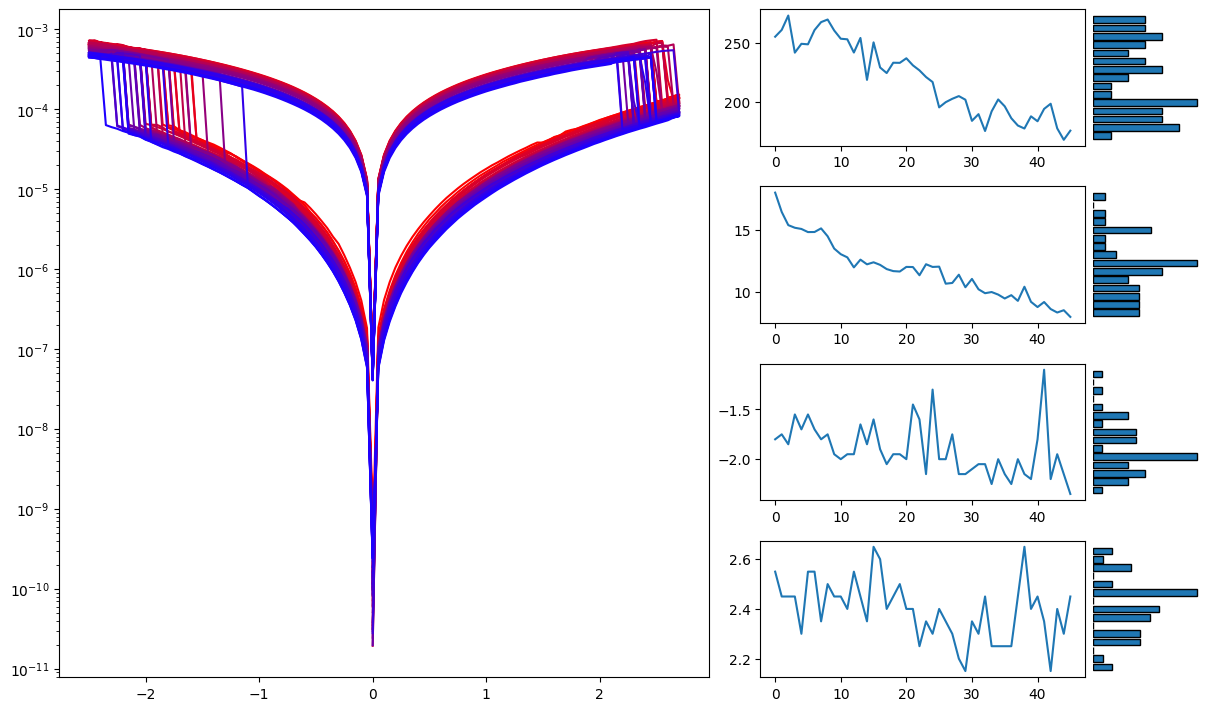

In [7]:
d.full_ReRAM_info(dict_of_measurs=dict_4, I_on_off = I, V_on_off = V, current_scale = 1000000, bins=15)